/home/yokoyama/conda/envs/robust-gan/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/10000 [00:00<?, ?it/s]/home/yokoyama/conda/envs/robust-gan/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
100%|██████████| 10000/10000 [01:24<00:00, 118.29it/s]


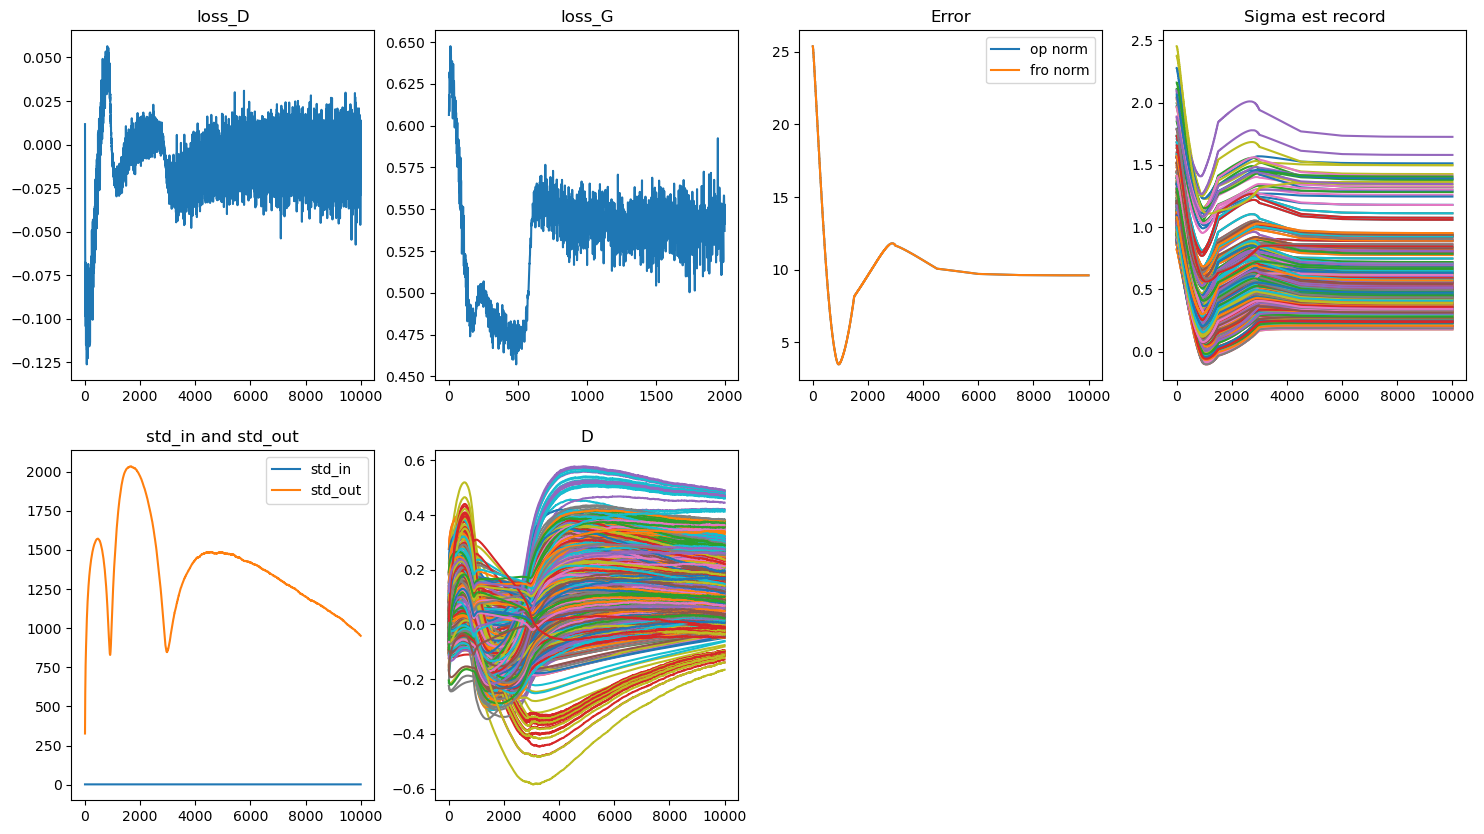

100%|██████████| 10000/10000 [01:26<00:00, 115.21it/s]


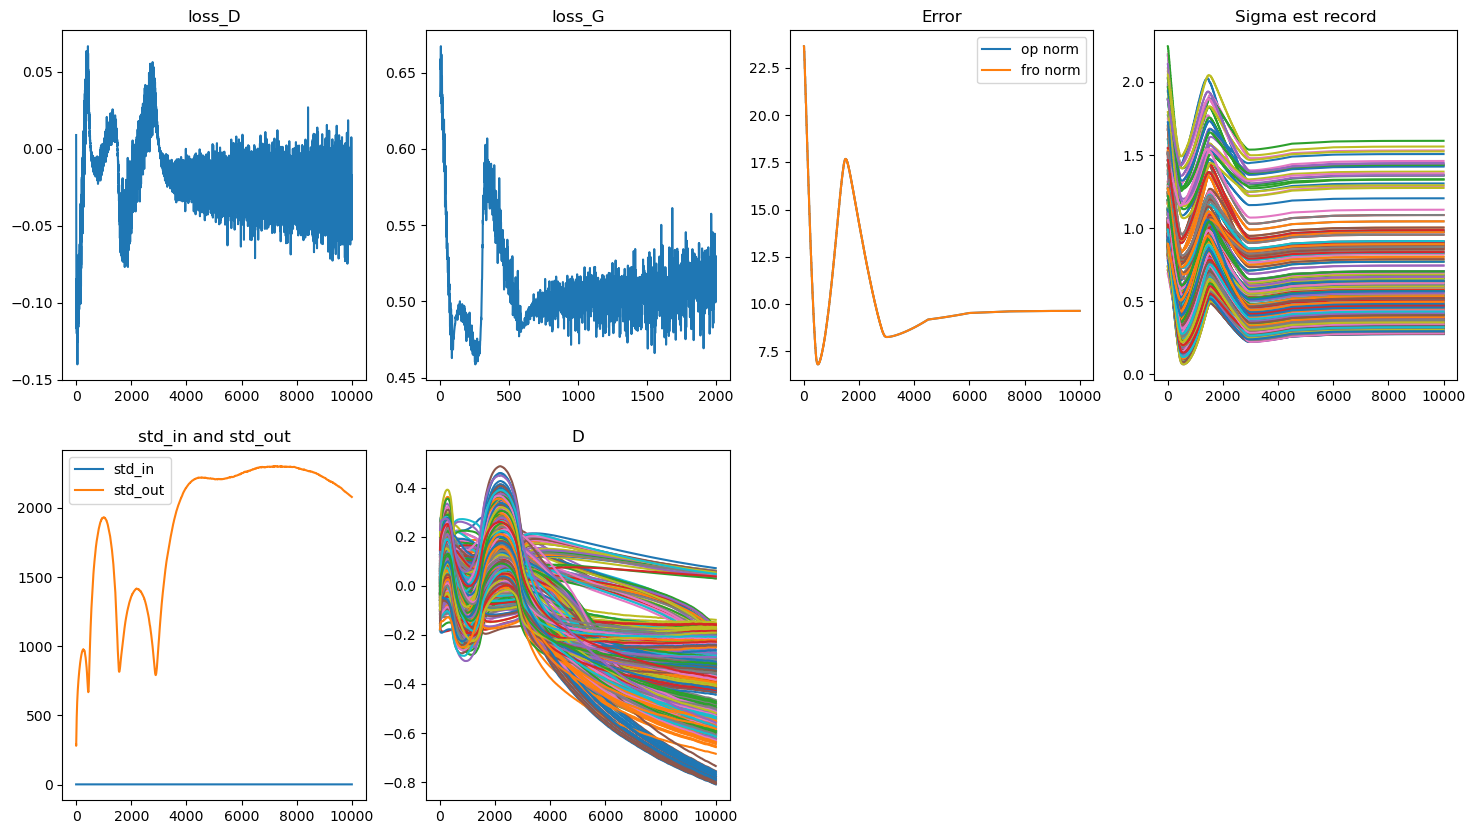

100%|██████████| 10000/10000 [01:26<00:00, 115.74it/s]


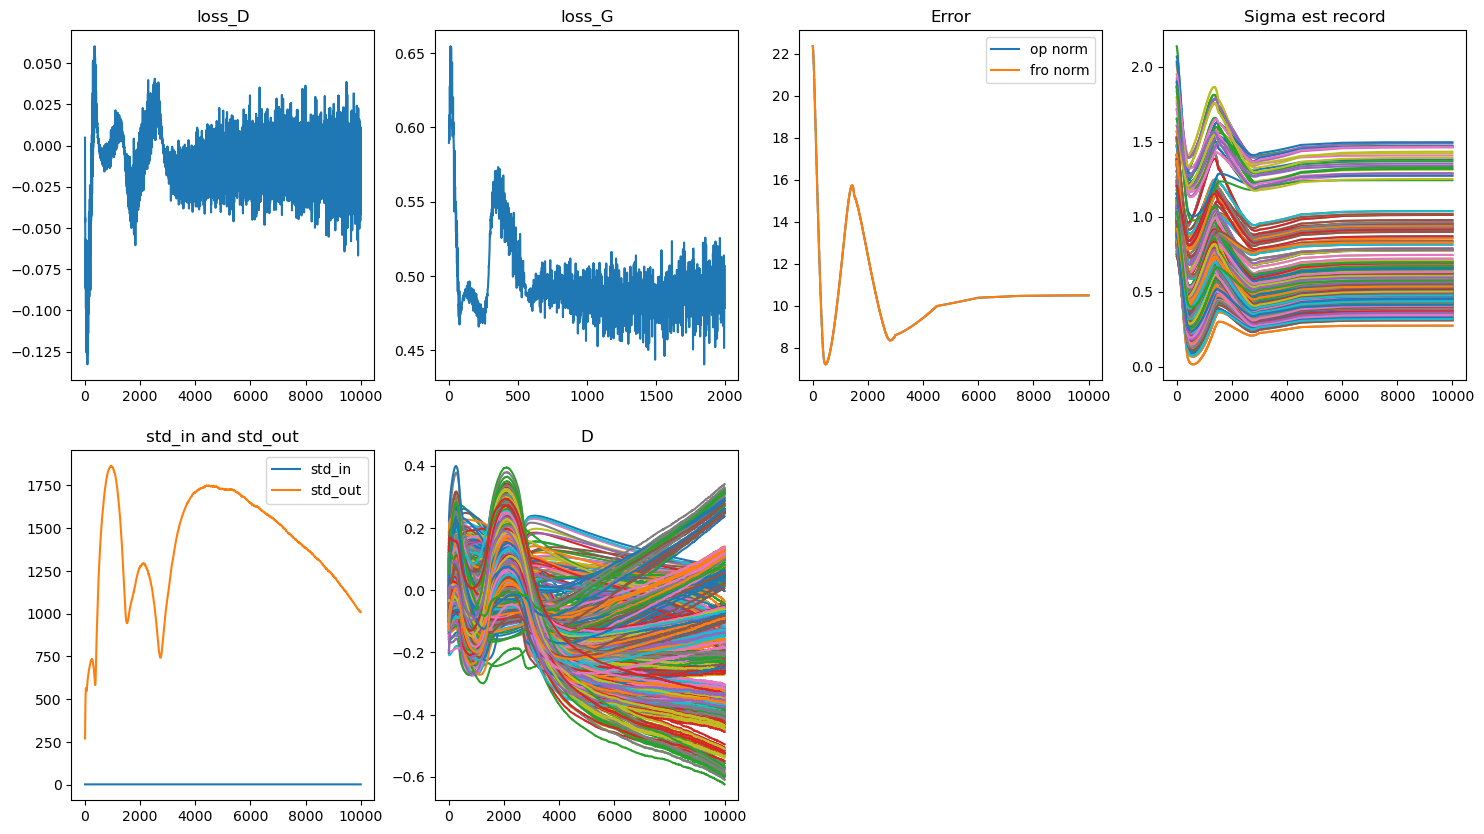

100%|██████████| 10000/10000 [01:26<00:00, 116.22it/s]


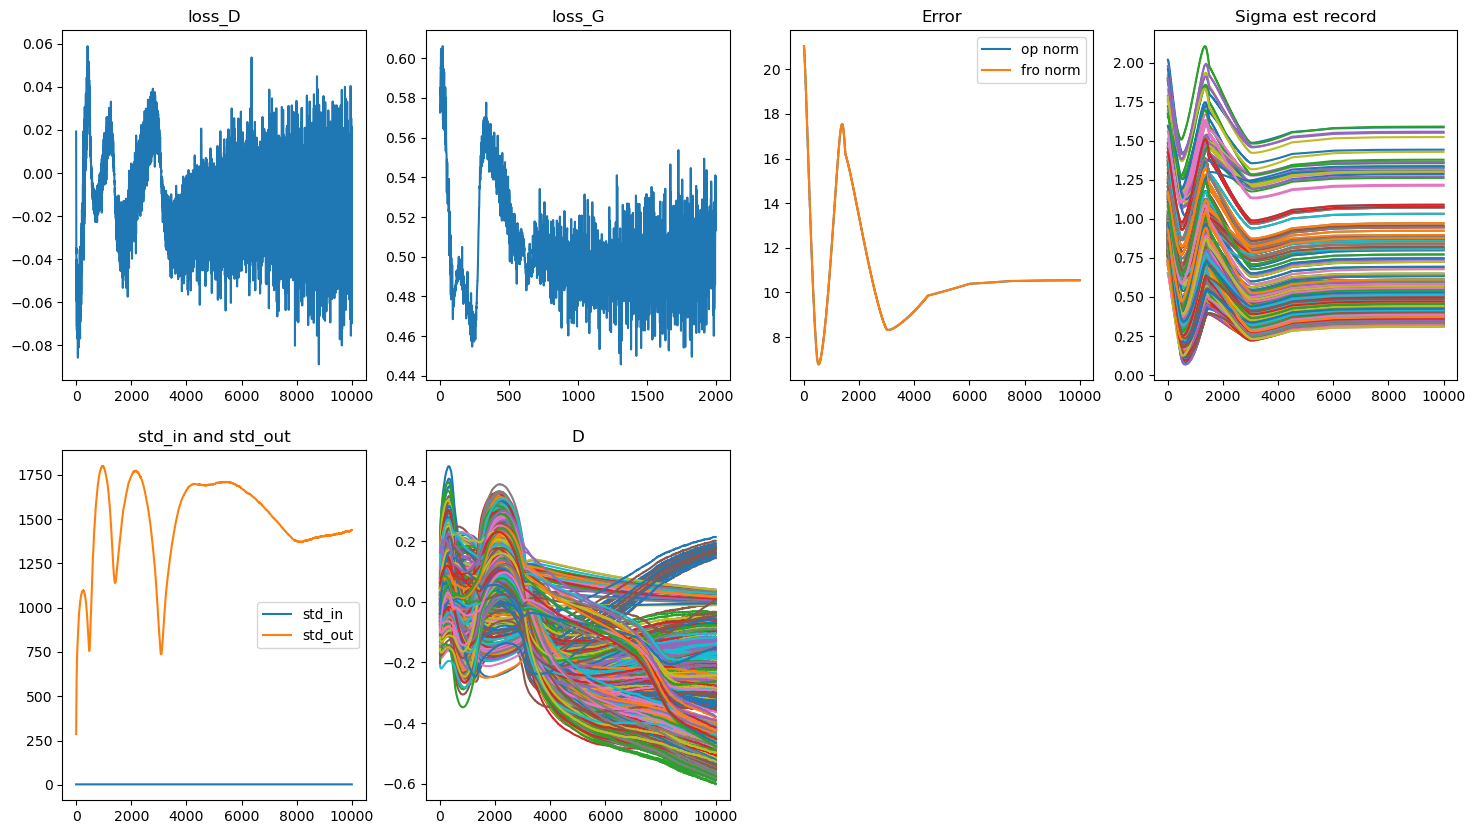

In [1]:
from sigma import Sigma
import numpy as np
import matplotlib.pyplot as plt
from utils import ar_cov, kendall
data_dim = 25
data_size = 50000
batch_size = 500
# batch
par = [2000, 2500]
mom = [0.1, 0.1, 0.3, 0.5]
cg = [1e-3, 1e-3, 1e-2, 1e-1]
for i in cg:
    gan = Sigma(data_dim, 0.2, 'cpu')
    true_mean = np.zeros(data_dim)
    out_mean = np.ones(data_dim) * 6
    gan.dist_init(true_mean, out_mean, ar_cov(data_dim), ar_cov(data_dim))
    gan.data_init(1000, 1000)
    gan.model_init()
    gan.optimizer_init(0.9, 0.25, 5, 1, 
                       weight_decay_d=1e-4, weight_decay_g=1e-4,
                       step_size=300 * 5, gamma=0.2, momentum=0, clip_grad=1)
    gan.fit(2000 * 5)
    gan.record(f'dim{data_dim}size{data_size}-{batch_size}/{i}/')
    gan.plot()

In [5]:
gan.D_record[0] - gan.D_record[-1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [33]:
import torch
data = torch.tensor([
    [1, 2, 3],
    [1, 2, 3],
    [2, 2, 4]    
])
A = torch.diag(torch.tensor([1, 2, 3]))
Adata = torch.matmul(A, data.T).T
Adata

tensor([[ 1,  4,  9],
        [ 1,  4,  9],
        [ 2,  4, 12]])

In [12]:
torch.dot(Adata, data.T)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [43]:
single_data = torch.tensor([2, 2, 3])
As = torch.matmul(data, single_data.T)
As, As.T

(tensor([15, 15, 20]), tensor([15, 15, 20]))

In [22]:
torch.matmul(As, single_data)

tensor(120)

In [32]:

data = torch.randn(100, 5)
ken = torch.tensor(kendall(data))
torch.matmul(ken, ken.T) - torch.matmul(ken.T, ken)

tensor([[0.0000e+00, 3.4694e-18, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.4694e-18, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       dtype=torch.float64)

In [40]:
import numpy as np
ndata = np.array(data)
torch.matmul(data, data.T).T - ndata @ ndata.T

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [41]:
torch.matmul(data, data.T)

tensor([[14, 14, 18],
        [14, 14, 18],
        [18, 18, 24]])